# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Traffic Distribution by Hour Visualization


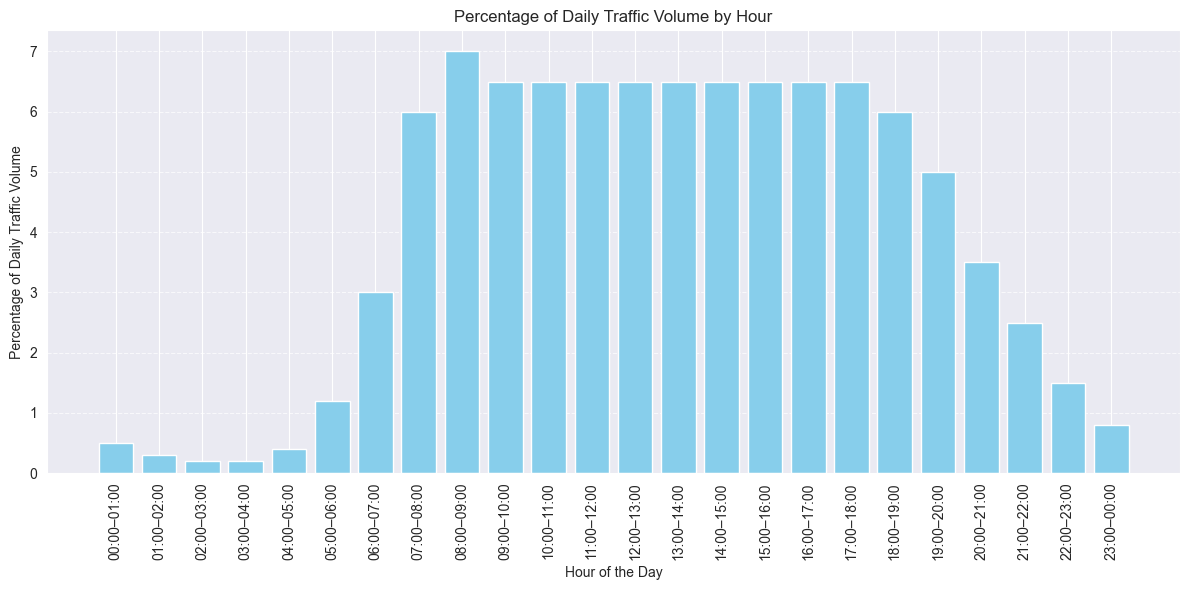

In [2]:
# Data for the graph
hours = [
    "00:00–01:00", "01:00–02:00", "02:00–03:00", "03:00–04:00",
    "04:00–05:00", "05:00–06:00", "06:00–07:00", "07:00–08:00",
    "08:00–09:00", "09:00–10:00", "10:00–11:00", "11:00–12:00",
    "12:00–13:00", "13:00–14:00", "14:00–15:00", "15:00–16:00",
    "16:00–17:00", "17:00–18:00", "18:00–19:00", "19:00–20:00",
    "20:00–21:00", "21:00–22:00", "22:00–23:00", "23:00–00:00"
]

traffic_percentage = [
    0.5, 0.3, 0.2, 0.2, 0.4, 1.2, 3.0, 6.0, 7.0, 6.5, 6.5, 6.5, 6.5, 6.5,
    6.5, 6.5, 6.5, 6.5, 6.0, 5.0, 3.5, 2.5, 1.5, 0.8
]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(hours, traffic_percentage, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Hour of the Day")
plt.ylabel("Percentage of Daily Traffic Volume")
plt.title("Percentage of Daily Traffic Volume by Hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

# Percentage of Urban vs Non-Urban Roads in Israel

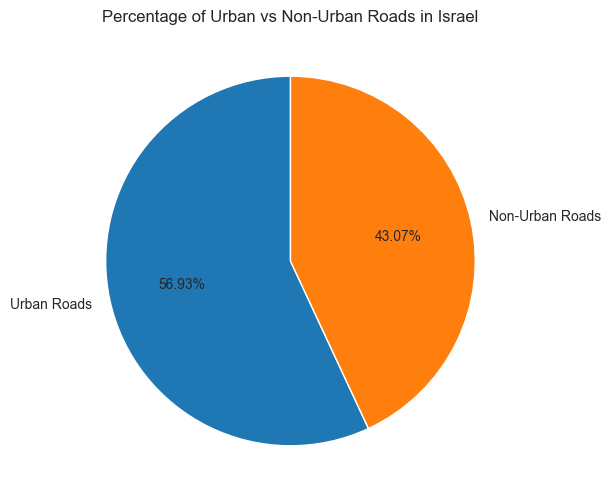

In [3]:
# Define the total road length and the breakdown of urban and non-urban roads
total_road_length = 19224  # in kilometers
urban_road_length = 10945  # in kilometers
non_urban_road_length = 8279  # in kilometers

# Calculate the percentage for each type of road
urban_percentage = (urban_road_length / total_road_length) * 100
non_urban_percentage = (non_urban_road_length / total_road_length) * 100

# Data for the graph
labels = ['Urban Roads', 'Non-Urban Roads']
percentages = [urban_percentage, non_urban_percentage]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Percentage of Urban vs Non-Urban Roads in Israel')
plt.show()

# Percentage of Drivers by Area in Israel

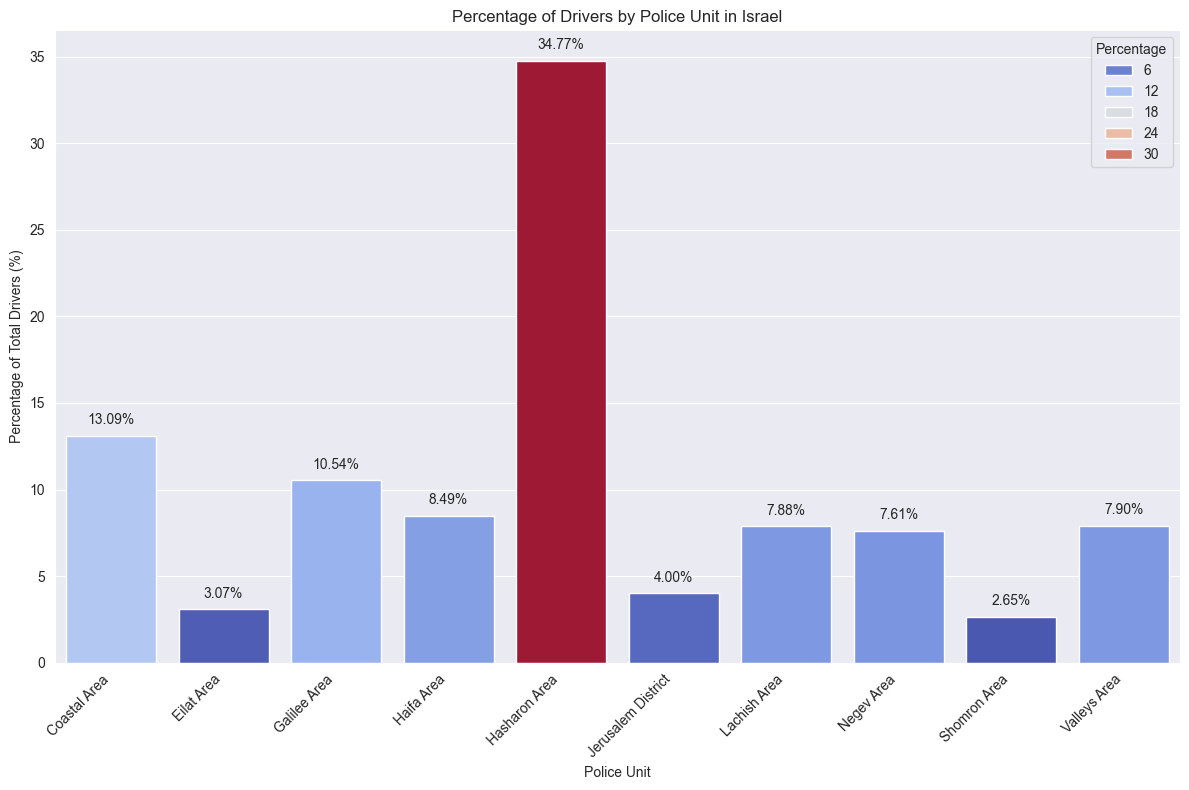

In [4]:
# Load and clean the dataset
file_path = './Datasets/annual_drive_km_per_city.csv'

city_data_cleaned = pd.read_csv(
    file_path,
    skiprows=14,  # Start at the row where actual data begins (Umm Al-Fahm onward)
    names=["City", "Annual_Kilometers_Travelled", "Licenced_to_Drive",
           "Privately_Owned_Vehicles", "Population", "Notes1", "Notes2"],
    usecols=["City", "Licenced_to_Drive"]
)

# Drop any rows with NaN values in essential columns
city_data_cleaned = city_data_cleaned.dropna(subset=["City", "Licenced_to_Drive"])

# Convert Licenced_to_Drive column to numeric
city_data_cleaned["Licenced_to_Drive"] = pd.to_numeric(
    city_data_cleaned["Licenced_to_Drive"].str.replace(",", "", regex=False), errors="coerce"
)

# Map cities to police units
city_to_police_unit = {
    "Umm Al-Fahm": "Valleys Area",
    "Ofaqim": "Negev Area",
    "Or Yehuda": "Hasharon Area",
    "Or Aqiva": "Coastal Area",
    "Elat": "Eilat Area",
    "Elad": "Hasharon Area",
    "Ari'el": "Shomron Area",
    "Ashdod": "Lachish Area",
    "Ashqelon": "Lachish Area",
    "Baqa Al-Gharbiyya": "Valleys Area",
    "Be'er Sheva": "Negev Area",
    "Bet She'an": "Valleys Area",
    "Bet Shemesh": "Jerusalem District",
    "Betar Illit": "Jerusalem District",
    "Bene Beraq": "Hasharon Area",
    "Bat Yam": "Hasharon Area",
    "Giv'at Shemuel": "Hasharon Area",
    "Giv'atayim": "Hasharon Area",
    "Dimona": "Negev Area",
    "Hod HaSharon": "Hasharon Area",
    "Herzliyya": "Hasharon Area",
    "Hadera": "Coastal Area",
    "Holon": "Hasharon Area",
    "Haifa": "Haifa Area",
    "Tiberias": "Galilee Area",
    "Tayibe": "Coastal Area",
    "Tire": "Coastal Area",
    "Tirat Karmel": "Haifa Area",
    "Tamra": "Galilee Area",
    "Yavne": "Lachish Area",
    "Yehud": "Hasharon Area",
    "Yoqne'am Illit": "Haifa Area",
    "Jerusalem": "Jerusalem District",
    "Kefar Yona": "Hasharon Area",
    "Kefar Sava": "Hasharon Area",
    "Kafar Qasem": "Hasharon Area",
    "Karmi'el": "Galilee Area",
    "Lod": "Coastal Area",
    "Migdal HaEmeq": "Galilee Area",
}

# Add police unit information to the DataFrame
city_data_cleaned["Police Unit"] = city_data_cleaned["City"].map(city_to_police_unit)

# Aggregate the total licensed drivers by police unit
police_unit_drivers = city_data_cleaned.groupby("Police Unit")["Licenced_to_Drive"].sum().reset_index()

# Calculate the percentage of drivers in each police unit
total_drivers = police_unit_drivers["Licenced_to_Drive"].sum()
police_unit_drivers["Percentage"] = (police_unit_drivers["Licenced_to_Drive"] / total_drivers) * 100

# Set Police Unit as the index for plotting
police_unit_drivers.set_index("Police Unit", inplace=True)

# Plot the percentage of drivers by police unit with annotations
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=police_unit_drivers.index,
    y=police_unit_drivers["Percentage"],
    palette="coolwarm",
    hue=police_unit_drivers["Percentage"]
)

# Add annotations for each bar
for index, row in police_unit_drivers.iterrows():
    ax.text(
        x=index,
        y=row["Percentage"] + 0.5,  # Adjust the position slightly above the bar
        s=f'{row["Percentage"]:.2f}%',
        ha='center',
        va='bottom'
    )

plt.title("Percentage of Drivers by Police Unit in Israel")
plt.xlabel("Police Unit")
plt.ylabel("Percentage of Total Drivers (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Bar Chart Visualization of Licensed Drivers by Age Group

Sum of normalized percentages: 100.0%


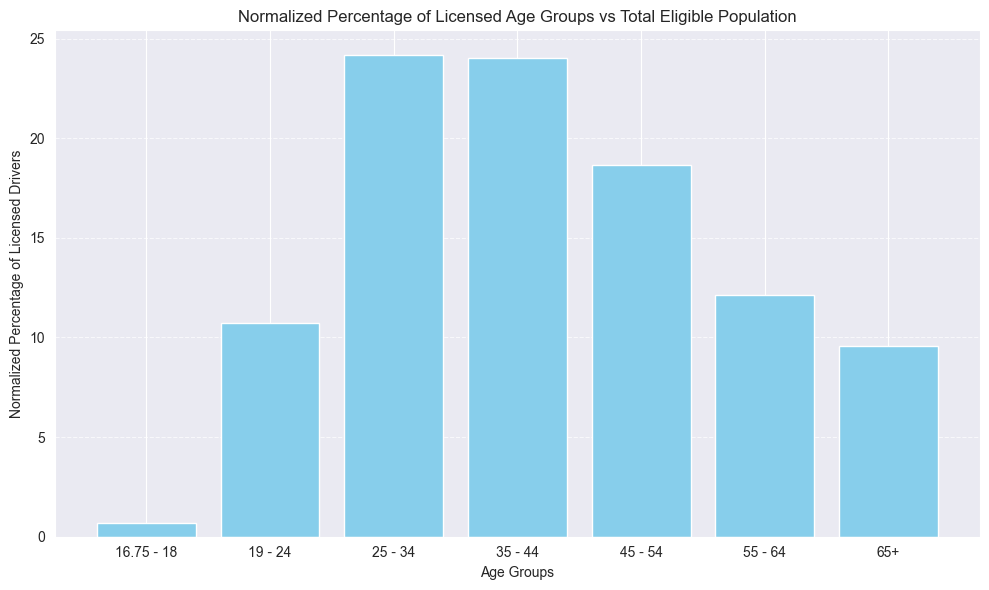

In [5]:
# Original data
age_groups = [
    "16.75 - 18", "19 - 24", "25 - 34", "35 - 44",
    "45 - 54", "55 - 64", "65+"
]
percentages = [0.35, 5.65, 12.74, 12.65, 9.83, 6.38, 5.04]

# Normalize the data so the sum equals 100%
total = sum(percentages)
normalized_percentages = [(value / total) * 100 for value in percentages]

# Proof that the sum is 100%
sum_normalized = sum(normalized_percentages)
print(f"Sum of normalized percentages: {sum_normalized}%")  # Should be 100%

# Plotting the normalized data
plt.figure(figsize=(10, 6))
plt.bar(age_groups, normalized_percentages, color='skyblue')
plt.xlabel("Age Groups")
plt.ylabel("Normalized Percentage of Licensed Drivers")
plt.title("Normalized Percentage of Licensed Age Groups vs Total Eligible Population")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()
